In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

# Time Series Forecasting
A time series is a sequence where a metric is recorded over regular time intervals.
Forecasting is the next step where you want to predict the future values the series is going to take.

If you use only the previous values of the time series to predict its future values, it is called Univariate Time Series Forecasting.

And if you use predictors other than the series (a.k.a exogenous variables) to forecast it is called Multi Variate Time Series Forecasting.

In [3]:
df = pd.read_csv('data/airline-passengers.csv',parse_dates=['Month'],index_col=['Month'])

'''Import the data set and change month data from string to datetime objective and set month as index column'''

df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


# ARIMA Models

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.
An ARIMA model is characterized by 3 terms: p, d, q
where,

p is the order of the AR term

q is the order of the MA term

d is the number of differencing required to make the time series stationary

If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’.



C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


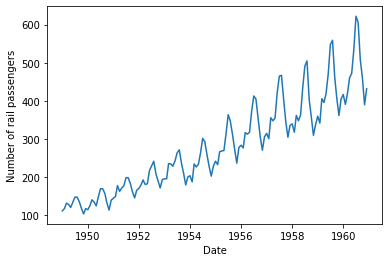

In [6]:
plt.xlabel('Date')
plt.ylabel('Number of rail passengers')
plt.plot(df)
plt.show()

# What are AR and MA models

So what are AR and MA models? what is the actual mathematical formula for the AR and MA models?

A pure Auto Regressive (AR only) model is one where Yt depends only on its own lags. That is, Yt is a function of the ‘lags of Yt’.
            Yt = ⍺+β1Y(t-1)+β2Y(t-2)+......+βpY(t-p)+ε

where, $Y{t-1}$ is the lag1 of the series, $\beta1$ is the coefficient of lag1 that the model estimates and $\alpha$ is the intercept term, also estimated by the model.

Likewise a pure Moving Average (MA only) model is one where Yt depends only on the lagged forecast errors.
    
            Yt = ⍺+εt+ϕ1ε(t-1)+ϕ2ε(t-2)+....+ϕpε(t-p)


So what does the equation of an ARIMA model look like?

An ARIMA model is one where the time series was differenced at least once to make it stationary and you combine the AR and the MA terms. So the equation becomes:

            Yt = ⍺+β1Y(t-1)+β2Y(t-2)+......+βpY(t-p)εt+ϕ1ε(t-1)+ϕ2ε(t-2)+....+ϕqε(t-q)                

ARIMA model in words:

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

The objective, therefore, is to identify the values of p, d and q. But how?


Before build a time series model we have to ensure that the time series is stationary.There are 2 primary way to do that.
One is Rolling Statistic
Another one is Augmented Dickey-Fuller Test


# Rolling Statistic
plot the rolling mean and standard deviation.The time series is stationary if they remain constant with time.

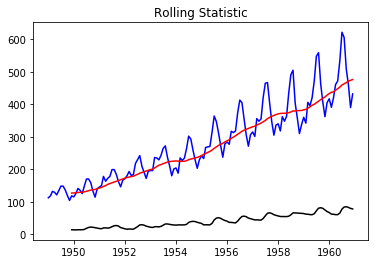

In [7]:
rolling_mean=df.rolling(window=12).mean()
rolling_std=df.rolling(window=12).std()
plt.plot(df,color='blue',label='Orginal')
plt.plot(rolling_mean,color='red',label='rolling_mean')
plt.plot(rolling_std,color='black',label='rolling_std')
plt.title('Rolling Statistic')
plt.show()


# Augmented Dickey-Fuller Test
The time series is consider stationary if the p-value is low

In [8]:
result = adfuller(df['Passengers'])
print('ADF statistic :{}'.format(result[0]))
print('P value :{}'.format(result[1]))
print('Critical value :{}')
for key, value in result[4].items():
    print('\t{}:{}'.format(key,value))


ADF statistic :0.8153688792060423
P value :0.9918802434376409
Critical value :{}
	1%:-3.4816817173418295
	5%:-2.8840418343195267
	10%:-2.578770059171598


### Here p-value is greater than the threshold(.05). So, we can conclude that the time series is not stationary.

Taking the log of the dependent variable is as simple way of lowering the rate at which rolling mean inceases.

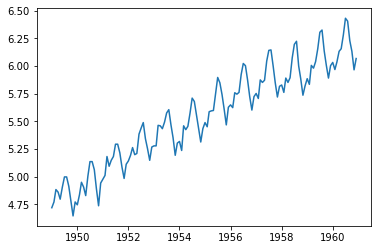

In [9]:
df_log = np.log(df)
plt.plot(df_log)

In [10]:
'''Create a function to run the two tests which determine whether a given time series is stationary'''

def get_stationarity(timeseries):
    #rolling statistic
    rolling_mean= timeseries.rolling(window=12).mean()
    rolling_std= timeseries.rolling(window=12).std()
    #rolling statistic plot
    orginal=plt.plot(timeseries,color='blue',label='Orginal')
    mean=plt.plot(rolling_mean,color='red',label='Rolling Mean')
    std=plt.plot(rolling_std,color='black',label='Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Rolling Statistics')
    plt.show(block=False)
    
    #Dickey Fuller Test
    result=adfuller(timeseries['Passengers'])
    print('ADF statistic :{}'.format(result[0]))
    print('P value :{}'.format(result[1]))
    print('Critical value :{}')
    for key, value in result[4].items():
        print('\t{}:{}'.format(key,value))
    

There are multiple transformations that we can apply to a time series to render it stationary.For instance,
we subtract the rolling mean.


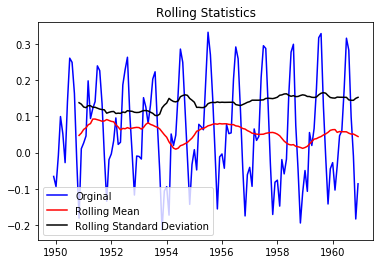

ADF statistic :-3.162907991300858
P value :0.022234630001243844
Critical value :{}
	1%:-3.4865346059036564
	5%:-2.8861509858476264
	10%:-2.579896092790057


In [11]:
rolling_mean=df_log.rolling(window=12).mean()
df_log_minus_mean =df_log-rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

Now we can see that after subtracting the mean,the rolling mean,the rolling standard deviation are aproximately horizontal.
The p-value is below the threshold and ADF statistic is close to the critical values.So, now we can say that the time
series is stationary.


# What does the p, d and q in ARIMA model mean

The first step to build an ARIMA model is to make the time series stationary.

Why?

Because, term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.

[ In statistics and econometrics, a distributed lag model is a model for time series data in which a regression equation is used to predict current values of a dependent variable based on both the current values of an explanatory variable and the lagged (past period) values of this explanatory variable.]

##So how to make a series stationary?

The most common approach is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

The value of d, therefore, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0.

Next, what are the ‘p’ and ‘q’ terms?

‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

# Find the order of differencing (d) in ARIMA model

The purpose of differencing it to make the time series stationary.

But you need to be careful to not over-difference the series. Because, an over differenced series may still be stationary, which in turn will affect the model parameters.

So how to determine the right order of differencing?

The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

In the event, you can’t really decide between two orders of differencing, then go with the order that gives the least standard deviation in the differenced series.

Let’s see how to do it with an example.

First, I am going to check if the series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.

Why?

Because, you need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

# Find the order of the AR term (p)

The next step is to identify if the model needs any AR terms. You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

But what is PACF?

Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.

So what is the formula for PACF mathematically?

Partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y.

$$Yt = \alpha0 + \alpha1 Y{t-1} + \alpha2 Y{t-2} + \alpha3 Y{t-3}$$

That is, suppose, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y_t-3) is the coefficient $\alpha_3$ of Y_t-3 in the above equation.

Good. Now, how to find the number of AR terms?

Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


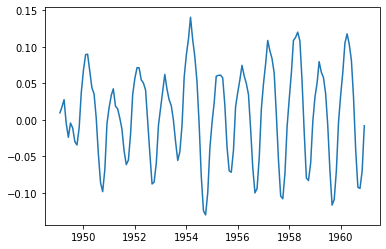

In [12]:
'''You can think of a time series as being composed of trend, seasonal and residual components. 
This can be a good way to think about the data when you go about modeling it. 
If you know the period of the time series you can decompose it into these components. '''
decomposition=seasonal_decompose(df_log)

model=ARIMA(df_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(results.fittedvalues)

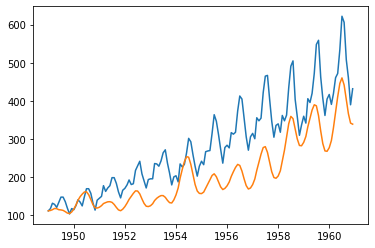

In [13]:
predictions_ARIMA_diff=pd.Series(results.fittedvalues,copy=True)
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log=pd.Series(df_log['Passengers'].iloc[0],index=df_log.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

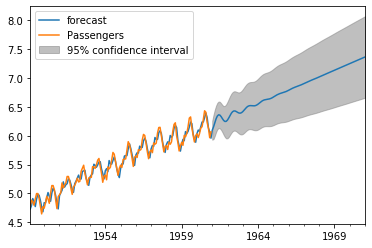

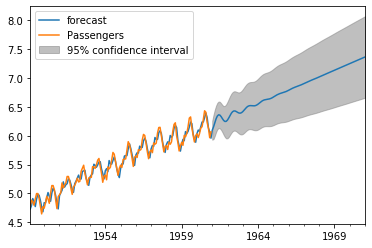

In [15]:
results.plot_predict(1,264)